# Preamble

In [ ]:
# preamble

base_directory_str = '/content/gdrive/My Drive/bio_NN_research/bio-learning/my_article_code/code_for_GitHub'


import numpy as np
import torch

import matplotlib.pyplot as plt

from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

import pickle

from google.colab import drive


import numpy as np

import os

import time


import random

import shutil

!pip install import-ipynb
import import_ipynb


from datetime import datetime
from pytz import timezone    


drive.mount('/content/gdrive', force_remount=True)


if(os.path.isfile('/content/my_weight.ipynb')):
  os.remove('/content/my_weight.ipynb')


if(os.path.isfile('/content/my_coding.ipynb')):
  os.remove('/content/my_coding.ipynb')

if(os.path.isfile('/content/my_dataset.ipynb')):
  os.remove('/content/my_dataset.ipynb')
  

  

shutil.copy ( base_directory_str + '/my_modules/my_coding.ipynb'  , '/content/' )    

import my_coding


shutil.copy (  base_directory_str + '/my_modules/my_weight.ipynb'  , '/content/'  )    

import my_weight
# my_weight.dtype = torch.float32






shutil.copy ( base_directory_str + '/my_modules/my_dataset.ipynb'  , '/content/' )    

import my_dataset




if(os.path.isfile('/content/my_signal_processing.ipynb')):
  os.remove('/content/my_signal_processing.ipynb')
  

shutil.copy (  base_directory_str + '/my_modules/my_signal_processing.ipynb'  , '/content/' )    

import my_signal_processing



if(os.path.isfile('/content/my_model.ipynb')):
  os.remove('/content/my_model.ipynb')
  

shutil.copy (  base_directory_str + '/my_modules/my_model.ipynb'  , '/content/' )    

import my_model




base_directory_data_str =  base_directory_str + '/data/F10_Practical_considerations/'
base_directory_figure_str =  base_directory_str + '/figures/F10_Practical_considerations/'



if not os.path.exists(  base_directory_data_str  ):
    os.makedirs( base_directory_data_str )
    print("data saving path did not exist and created")


if not os.path.exists(  base_directory_figure_str  ):
    os.makedirs( base_directory_figure_str )
    print("figure saving path did not exist and created")

dtype = torch.float
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(device)
plt.rcParams["mathtext.default"]= 'regular'
plt_fontsize_text_ = 9
plt_fontsize_title_ = 9
plt_fontsize_label_ = 7
plt_fontsize_legend_ = 9


my_cycle =  [u'#1f77b4'    , u'#ff7f0e'    , u'#2ca02c'   , u'#d62728'   , u'#7f7f7f'   , u'#17becf'     , u'#9467bd'    ,  u'#8c564b'    , u'#e377c2'  ,   u'#7f7f7f' ]
my_cycle2 = [u'#1f77b455'  , u'#ff7f0e55'  , u'#2ca02c55' , u'#d6272855' , u'#7f7f7f55' , u'#17becf55'   , u'#9467bd55'  ,  u'#8c564b55'  , u'#e377c2'  ,   u'#7f7f7f' ]

cm_to_inch = 1/2.54  # centimeters in inches
figure_width1 = 9*cm_to_inch
figure_width2 = 19*cm_to_inch



def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])


import io

class CPU_Unpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'torch.storage' and name == '_load_from_bytes':
            return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
        else: return super().find_class(module, name)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Mounted at /content/gdrive
importing Jupyter notebook from my_coding.ipynb
importing Jupyter notebook from my_weight.ipynb
importing Jupyter notebook from my_dataset.ipynb


  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./FashionMNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST_data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./FashionMNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST_data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./FashionMNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST_data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./FashionMNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST_data/FashionMNIST/raw

importing Jupyter notebook from my_signal_processing.ipynb
importing Jupyter notebook from my_model.ipynb
cuda


# Load MNIST

In [ ]:
# str_dir_data_mnist = "/content/gdrive/MyDrive/bio_NN_research/mnist_data/"

# str_dir_data_mnist22 = base_directory_str + "/mnist_data/"

# def copytree(src, dst, symlinks=False, ignore=None):
#     for item in os.listdir(src):
#         s = os.path.join(src, item)
#         d = os.path.join(dst, item)
#         if os.path.isdir(s):
#             shutil.copytree(s, d, symlinks, ignore)
#         else:
#             shutil.copy2(s, d)

# copytree(str_dir_data_mnist , str_dir_data_mnist22 )








str_dir_data_mnist = base_directory_str + "/mnist_data/"

def copytree(src, dst, symlinks=False, ignore=None):
    for item in os.listdir(src):
        s = os.path.join(src, item)
        d = os.path.join(dst, item)
        if os.path.isdir(s):
            shutil.copytree(s, d, symlinks, ignore)
        else:
            shutil.copy2(s, d)
copytree(str_dir_data_mnist , "/content/mnist_data" )





In [ ]:

batch_size = 1000


train_loader50_shuffle , test_loader50_shuffle , code_map50_shuffle , x_shape50_shuffle   =   my_dataset.get_MNIST_dataset(  coding_layers = [50]  , ones_in_layes = [ 5 ]   , batch_size=batch_size , device = device  , flatten = True  , size=15 , shuffle  = True )


train_loader50 , test_loader50 , code_map50 , x_shape50   =   my_dataset.get_MNIST_dataset(  coding_layers = [50]  , ones_in_layes = [ 5 ]   , batch_size=batch_size , device = device  , flatten = True  , size=15 , shuffle  = False )





Using downloaded and verified file: ./mnist_data/MNIST/raw/train-images-idx3-ubyte.gz
Extracting ./mnist_data/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist_data/MNIST/raw

Using downloaded and verified file: ./mnist_data/MNIST/raw/train-labels-idx1-ubyte.gz
Extracting ./mnist_data/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist_data/MNIST/raw

Using downloaded and verified file: ./mnist_data/MNIST/raw/t10k-images-idx3-ubyte.gz
Extracting ./mnist_data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist_data/MNIST/raw

Using downloaded and verified file: ./mnist_data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Extracting ./mnist_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist_data/MNIST/raw



# Single run function

In [ ]:





def calculate_alignment_term_o_l_k_no_last_delta( o , l ,  Dfunc ,  W_k_l ,  L_k_l , b_l   ,  Z_k_l   ,   B_l  ,  delta_k_l    ):


  k=-1

  return calculate_alignment_term_no_last_delta( Dfunc = Dfunc ,  W_lm1_kmo = W_k_l[k-o][l-1]   , b_l_k = b_l[l]  ,  Z_l_kmo = Z_k_l[k-o][l]
                                  ,   B_l  = B_l[l]   ,  delta_lp1_kmo = delta_k_l[k-o][l+1] 
                                  ,  L_lm1_kmo = L_k_l[k-o][l-1] , L_lm1_k = L_k_l[k][l-1] 
                                  )




def calculate_alignment_term_no_last_delta( Dfunc ,  W_lm1_kmo  , b_l_k   ,  Z_l_kmo   ,   B_l  ,  delta_lp1_kmo   ,  L_lm1_kmo  , L_lm1_k    ):


  alignment_term_o_l_k  =  torch.matmul(  B_l.t()  ,  delta_lp1_kmo.t()  )

  alignment_term_o_l_k = torch.mul(  alignment_term_o_l_k  ,  Dfunc(   Z_l_kmo.t()  )      )

  alignment_term_o_l_k = torch.matmul(  alignment_term_o_l_k  ,  L_lm1_kmo    )

  alignment_term_o_l_k = torch.matmul(  alignment_term_o_l_k  ,  L_lm1_k.t()    )

  zeta_o_l_k =   torch.matmul(  L_lm1_k  ,  W_lm1_kmo  ) + b_l_k


  alignment_term_o_l_k = torch.mul(  Dfunc( zeta_o_l_k.t()   )  ,  alignment_term_o_l_k  )

 



  return alignment_term_o_l_k


  







def calculate_alignment_term_o_l_k( o , l ,  Dfunc ,  W_k_l ,  L_k_l , b_l   ,  Z_k_l   ,   B_l  ,  delta_k_l   , eta_2 ):


  k=-1

  return calculate_alignment_term( Dfunc = Dfunc ,  W_lm1_kmo = W_k_l[k-o][l-1]   , b_l_k = b_l[l]  ,  Z_l_kmo = Z_k_l[k-o][l]
                                  ,   B_l  = B_l[l]   ,  delta_lp1_kmo = delta_k_l[k-o][l+1] ,  L_lm1_kmo = L_k_l[k-o][l-1] , L_lm1_k = L_k_l[k][l-1] ,  delta_lp1_k = delta_k_l[k][l+1] , eta_2 = eta_2 )




def calculate_alignment_term( Dfunc ,  W_lm1_kmo  , b_l_k   ,  Z_l_kmo   ,   B_l  ,  delta_lp1_kmo   ,  L_lm1_kmo  , L_lm1_k  ,  delta_lp1_k , eta_2 ):


  alignment_term_o_l_k  =  torch.matmul(  B_l.t()  ,  delta_lp1_kmo.t()  )

  alignment_term_o_l_k = torch.mul(  alignment_term_o_l_k  ,  Dfunc(   Z_l_kmo.t()  )      )

  alignment_term_o_l_k = torch.matmul(  alignment_term_o_l_k  ,  L_lm1_kmo    )

  alignment_term_o_l_k = torch.matmul(  alignment_term_o_l_k  ,  L_lm1_k.t()    )

  zeta_o_l_k =   torch.matmul(  L_lm1_k  ,  W_lm1_kmo  ) + b_l_k


  alignment_term_o_l_k = torch.mul(  Dfunc( zeta_o_l_k.t()   )  ,  alignment_term_o_l_k  )

 
  alignment_term_o_l_k = torch.matmul(  alignment_term_o_l_k ,  delta_lp1_k  )*eta_2


  return alignment_term_o_l_k








def calculate_last_term_l_no_last_delta(  l ,   func  , W_lm1_0 , L_k_l  ,   b_l      ):

  

   return calculate_last_term_no_last_delta(   func  , W_lm1_0 , L_lm1_k = L_k_l[-1][l-1] ,   b_l_k = b_l[l]    )



def calculate_last_term_no_last_delta(   func  , W_lm1_0 , L_lm1_k  ,   b_l_k     ):

   zeta_k_l_k =   torch.matmul(  L_lm1_k  ,  W_lm1_0  ) + b_l_k

   return  func( zeta_k_l_k.t()  )    






def calculate_last_term_l(  l ,   func  , W_lm1_0 , L_k_l  ,   b_l  ,  delta_k_l  , eta  ):

  

   return calculate_last_term(   func  , W_lm1_0 , L_lm1_k = L_k_l[-1][l-1] ,   b_l_k = b_l[l]  ,  delta_lp1_k = delta_k_l[-1][l+1]  , eta = eta  )



def calculate_last_term(   func  , W_lm1_0 , L_lm1_k  ,   b_l_k  ,  delta_lp1_k  , eta  ):

   zeta_k_l_k =   torch.matmul(  L_lm1_k  ,  W_lm1_0  ) + b_l_k

   return torch.matmul(   func( zeta_k_l_k.t()  )    ,   delta_lp1_k  ) * eta






In [ ]:


def Single_run_function(str_dir_data_BASE , shuffle = False
            , bias = True
            , B_Norm_Match_During = False 
            , initial_B_normalization = True
            , Normalize_whole_W_ = None
            , Normalize_Column_W_ = None
            , lr = .0005
            , N_repeat = 10
            , save_details = False
            , label_smoothing = None
            , FA_method=True  
            , skip_existing = False
            ,  N_epoch = 30
           ):



  batch_size = 1000

  train_loader , test_loader , code_map , x_shape50  =  my_dataset.get_MNIST_dataset(  coding_layers = [50]  , ones_in_layes = [ 5 ]  
                                                                                    , batch_size=batch_size , device = device  
                                                                                    , flatten = True  , size=15 , shuffle  = shuffle , initial_shuffle = True )


  N_hidden = len(code_map[0][0])



  N_hidden_layers = 4

  N_input = 225

  N_output = N_hidden

  persistence = 1


  layers_info = []
  layers_info.append(N_input)

  for i in range(N_hidden_layers):
    layers_info.append(N_hidden)

  layers_info.append(N_output)

  print(layers_info)


  net = my_model.my_network1(layers_info, bias=bias ,initial_mean=0 , initial_var = 0.1)
  net.set_learning_rate(lr)

  if FA_method : str_direction_disc = "FA(W_" + str(N_hidden) + "_lr_" + str(lr).replace('.', 'd') +")"
  else:  str_direction_disc = "BP(W_" + str(N_hidden) + "_lr_" + str(lr).replace('.', 'd') +")"


  if Normalize_Column_W_ != None and type(Normalize_Column_W_) == list  :
    str_direction_disc = str_direction_disc + "(CWN_" + str( Normalize_Column_W_[0] ).replace('.', 'd')+ "_" + str( Normalize_Column_W_[1] ).replace('.', 'd') + ")"
  elif Normalize_Column_W_ != None and  ( type(Normalize_Column_W_) == float or type(Normalize_Column_W_) == int  ) :
    str_direction_disc = str_direction_disc + "(CWN_" + str( Normalize_Column_W_ ).replace('.', 'd') + ")"
    Normalize_Column_W_ = [Normalize_Column_W_,Normalize_Column_W_]




  
  elif Normalize_whole_W_ != None and  type(Normalize_whole_W_) != list :
    str_direction_disc = str_direction_disc + "(WWN_" + str( Normalize_whole_W_ ).replace('.', 'd')  + ")"
  elif Normalize_whole_W_ == None and Normalize_Column_W_ == None :
    str_direction_disc = str_direction_disc + "(NoWN)"
  else: raise Exception("no defined condition")  

  if shuffle == True:
    str_direction_disc = str_direction_disc + "(shuffle)"

  else:
    str_direction_disc = str_direction_disc + "(No_shuffle)"

    
  if initial_B_normalization == True:
    str_direction_disc = str_direction_disc + "(IBN)"

  else:
    str_direction_disc = str_direction_disc + "(NoIBN)"



  if (B_Norm_Match_During  == True)  :
    str_direction_disc = str_direction_disc + "(DBNM)"
  elif (B_Norm_Match_During  == False) :
    str_direction_disc = str_direction_disc + "(NoBNM)"
  else: raise Exception("no defined condition")  

  if bias == True :
      str_direction_disc = str_direction_disc + "(Bias)"
  else:
    str_direction_disc = str_direction_disc + "(NoBias)"

  
  if save_details == True :
      str_direction_disc = str_direction_disc + "(Detailed)"


  if label_smoothing != None : 
    str_direction_disc = str_direction_disc + "(LS_"+ str(label_smoothing[0]).replace('.', 'd')  + "_" + str(label_smoothing[1]).replace('.', 'd') + ")"


  print(str_direction_disc)
  str_t = str_direction_disc

  str_dir_data_BASE_exp =  str_dir_data_BASE  + str_direction_disc + "/"

  str_dir_data_BASE_exp =  str_dir_data_BASE  + str_direction_disc + "/"
  if not os.path.exists(str_dir_data_BASE_exp):
      os.makedirs(str_dir_data_BASE_exp)
  else:
    print("##############  path exist #################\n\n######################")
    if os.path.isfile(str_dir_data_BASE_exp + "/test_accuracy_list_repeat.txt") and skip_existing==True:
      print("############## file exist #################\n\n######################\n")

      return str_t

  text_file = open( str_dir_data_BASE_exp + "description.txt" , "w")

  text_file.write(str_direction_disc)




  N_layers = len(layers_info)-1
  L_N_layers = N_layers
  print(N_layers)





  angle_W_B = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  )
  angle_dBiad_BP_FA = torch.zeros( [N_layers + 1 , N_repeat , N_epoch*len(train_loader)*persistence ]  )

  angle_dW_B = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  )
  angle_dW_BP_FA = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  )


  if save_details == True :

    Save_dict = {
        
      "angle_zero_degree_term_B": torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  ),
      "angle_sum_zero_degree_term_B": torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  ),

      "angle_non_align_B": torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  ),
      "norm_non_align_to_DW": torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  ),




      "angle_remainder_B": torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  ),
      "norm_remainder_to_DW": torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  ),
      "angle_sum_remainder_B": torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  ),



      "angle_T_align_60_B": torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  ),
      "angle_T_align_1_B": torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  ),


      "angle_sum_T_align_1_B": torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  ),
      "angle_sum_T_align_60_B": torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  ),

      "test_accuracy" : torch.zeros( [ N_repeat , N_epoch]  ),





    }

    

  for key in Save_dict:
    if type(Save_dict[key]) ==  type(torch.tensor([1])):
      Save_dict[key][:] =  float('nan')

  sampling_list = np.arange(0,60*N_epoch,10)   + np.random.randint(0,3 , 6*N_epoch )


  for rep in range(N_repeat):


    train_loader , test_loader , code_map , x_shape50  =  my_dataset.get_MNIST_dataset(  coding_layers = [50]  , ones_in_layes = [ 5 ]  
                                                                                    , batch_size=batch_size , device = device  
                                                                                    , flatten = True  , size=15 , shuffle  = shuffle , initial_shuffle = True )
    

    iteration_k = 0 
    print(rep)
    
    text_file.write(str(rep)+'\n')
    
    if save_details == True :
      delta_list_k_l = []
      delta_BP_list_k_l = []
      # E_list_k_l = []
      L_list_k_l = []
      Z_list_k_l = []
      W_list_k_l = []



      sum_alignment_term = []
      sum_alignment_term_60 = []
      sum_remainder = []
      sum_last_term = []


      sum_supalignment_term = []
      for l in range(N_layers):
        sum_alignment_term .append(torch.zeros_like(net.W[l])  )
        sum_alignment_term_60 .append(torch.zeros_like(net.W[l])  )
        sum_remainder .append(torch.zeros_like(net.W[l])  )
        sum_last_term .append(torch.zeros_like(net.W[l])  )


        sum_supalignment_term   .append(torch.zeros_like(net.W[l])  )
      



    net = my_model.my_network1(layers_info, bias=bias ,initial_mean=0 , initial_var = 0.1)
    # print(net.bias_vec[-1])
    net.set_learning_rate(lr)

    
    
    if Normalize_Column_W_!=None and type(Normalize_Column_W_) == list:  
      net.seed_norms(Normalize_Column_W_[0],Normalize_Column_W_[1])
      net.column_normalize_W()
      if initial_B_normalization == True: net.column_normalize_B()

    elif Normalize_whole_W_!=None:
      net.normalize_W(Normalize_whole_W_)  
      if initial_B_normalization == True: net.normalize_B(Normalize_whole_W_)  



    for epoch_i in range(N_epoch):
      ########################################################## TEST
      with torch.no_grad():

        acc=0
        ntotal = 0
        for (x_in, y_n) in test_loader:
          x_in = x_in.to(device)
          y_n =  y_n.to(device)
          net_last_layers = net.forward(x_in)
          acc = acc + y_n.shape[0]*my_coding.get_accuracy( y_n , code_map , [net_last_layers] , top=1 , coef=None ) 
          ntotal = ntotal + y_n.shape[0]

        acc = acc / ntotal


      Save_dict["test_accuracy"]  [rep,epoch_i] = acc*100

      if ( epoch_i%5 == 0 ):
        print("epoch: " + str(epoch_i)  +  ",test_accu2: " + str(acc)  )
        text_file.write("epoch: " + str(epoch_i)  +  ",test_accu2: " + str(acc)+'\n')


      ################################################################################### TEST


      for iter , (x_in, y_n) in enumerate( train_loader ):




        x_in = x_in.to(device)
        if label_smoothing != None : y_n =  y_n.to(device)*label_smoothing[0] + label_smoothing[1]
        else : y_n =  y_n.to(device)

      
        for persist_i in range(persistence):

          if save_details == True :
            W_l = []
            for l in range(L_N_layers):

              W_l .append(  net.W[l].detach().clone() )

            
            W_list_k_l . append(  W_l   )




          for k in range(N_layers):
            angle_W_B[  k  ,  rep  ,  iteration_k ] = my_weight.angle( net.W[k] , net.B[k].t()  )  
          

             


          L_f = net.forward(x_in)


          E = y_n - L_f


          Delta_bp  , Delta_bias_bp = net.backprop(E)  ################################################################################### BP
          
          if save_details == True :
            delta_BP_l = [] 
            delta_BP_l.append(None)
            for l in range(1,N_layers+1):
              delta_BP_l.append(net.delta_BP[l].clone())




          Delta_fa , Delta_bias_fa = net.BP_TRW(E) ########################################################################################## FA
          




          for k in range(N_layers):
            angle_dW_B[  k  ,  rep  ,  iteration_k ] = my_weight.angle( Delta_fa[k] , net.B[k].t()  )  



            

          if save_details == True :
    

            delta_l = []
            # E_l = []
            L_l = []
            Z_l = []

            for l in range(L_N_layers+1):
              L_l .append(net.L[l].clone())

            delta_l.append(None)
            # E_l.append(None)
            Z_l.append(None)

            for l in range(1,N_layers+1):
              delta_l.append(net.delta_FA[l].detach().clone())
              # E_l.append(net.E_FA[l].detach().clone())
              Z_l .append(net.Z[l].detach().clone())



            delta_list_k_l . append(  delta_l  )
            # delta_BP_list_k_l.append(  delta_BP_l  )
            # E_list_k_l . append(  E_l   )
            L_list_k_l . append(  L_l  )
            Z_list_k_l . append(  Z_l   )


            if iteration_k in sampling_list:
              for l in range(1,L_N_layers):
                alignment_terms = calculate_last_term_l_no_last_delta(  l ,   func = net.activation1   , W_lm1_0 = W_list_k_l[0][l-1] , L_k_l = L_list_k_l
                                                    ,   b_l=net.bias_vec      )*lr


                alignment_term_zero_degree_term = torch.matmul(  alignment_terms  ,  delta_list_k_l[-1][l+1]  )  

                if iteration_k>0:
                  alignment_term_sum  =  calculate_alignment_term_o_l_k_no_last_delta( o=1 , l = l ,  Dfunc = net.derivative_activation1 ,  W_k_l=W_list_k_l 
                                                                                  ,  L_k_l = L_list_k_l , b_l = net.bias_vec
                                                                        ,  Z_k_l = Z_list_k_l   ,   B_l = net.B  ,  delta_k_l=delta_list_k_l    )
                  

                  
                
                  alignment_term_temp = torch.matmul( alignment_term_sum   ,  delta_list_k_l[-1][l+1]  )   *lr*lr
                  Save_dict["angle_T_align_1_B"][l , rep ,  iteration_k ] = my_weight.angle(   alignment_term_temp   , net.B[l].t()   )
                  # if iteration_k == 1000 : sum_alignment_term[l] = torch.zeros_like(sum_alignment_term[l])
                  sum_alignment_term[l] = sum_alignment_term[l] + alignment_term_temp 
                  Save_dict["angle_sum_T_align_1_B"][l , rep ,  iteration_k   ] = my_weight.angle(   sum_alignment_term[l]   , net.B[l].t()   )
                  # Save_dict["T_align_norms"][ l ,  rep  ,  iteration_k  ] = alignment_term_temp.norm() 

                  for o in range(2,iteration_k+1):
                      alignment_term = calculate_alignment_term_o_l_k_no_last_delta( o=o , l = l ,  Dfunc = net.derivative_activation1
                                                                                    ,  W_k_l=W_list_k_l ,  L_k_l = L_list_k_l , b_l = net.bias_vec
                                                                        ,  Z_k_l = Z_list_k_l   ,   B_l = net.B  ,  delta_k_l=delta_list_k_l    )


                      if o==60:
                        alignment_term_temp = torch.matmul( alignment_term   ,  delta_list_k_l[-1][l+1]  )  *lr*lr 
                        Save_dict["angle_T_align_60_B"][l , rep ,  iteration_k ] = my_weight.angle(   alignment_term_temp   , net.B[l].t()   )
                        sum_alignment_term_60[l] = sum_alignment_term_60[l] + alignment_term_temp
                        Save_dict["angle_sum_T_align_60_B"][l , rep ,  iteration_k   ] = my_weight.angle(   sum_alignment_term_60[l]   , net.B[l].t()   )
                        


                        

                      alignment_term_sum  += alignment_term


                  alignment_terms += alignment_term_sum*lr*lr


                remainder_l = lr*Delta_fa[l] - torch.matmul( alignment_terms   ,  delta_list_k_l[-1][l+1]  )   

                non_align = lr*Delta_fa[l] - torch.matmul( alignment_terms   ,  delta_list_k_l[-1][l+1]  )   + alignment_term_zero_degree_term



      
                Save_dict["angle_non_align_B"][l , rep ,  iteration_k ] = my_weight.angle(   non_align   , net.B[l].t()   )
                Save_dict["norm_non_align_to_DW"][l , rep ,  iteration_k ]  =   non_align.norm()   / (lr*Delta_fa[l]).norm()   



                sum_last_term[l] = sum_last_term[l] + alignment_term_zero_degree_term
                Save_dict["angle_zero_degree_term_B"][l , rep ,  iteration_k ] = my_weight.angle(   alignment_term_zero_degree_term   , net.B[l].t()   )
                Save_dict["angle_sum_zero_degree_term_B"][l , rep ,  iteration_k ] = my_weight.angle(   sum_last_term[l]   , net.B[l].t()   )




                Save_dict["angle_remainder_B"][l , rep ,  iteration_k ] = my_weight.angle(   remainder_l   , net.B[l].t()   )
                Save_dict["norm_remainder_to_DW"][l , rep ,  iteration_k ] =   remainder_l.norm()   / (lr*Delta_fa[l]).norm()   

                sum_remainder[l] = sum_remainder[l] + remainder_l
                Save_dict["angle_sum_remainder_B"][l , rep ,  iteration_k ] = my_weight.angle(   sum_remainder[l]   , net.B[l].t()   )
                





          if FA_method:
  
              net.step_W(Delta_fa) ############################################################################################# STEP FA
              if bias==True :
                net.step_bias(Delta_bias_fa)

          else:
 
              net.step_W(Delta_bp) ############################################################################################# STEP BP
              if bias==True :
                net.step_bias(Delta_bias_bp)



          
          if Normalize_Column_W_!=None and type(Normalize_Column_W_) == list :  net.column_normalize_W()
          elif Normalize_whole_W_!=None:  net.normalize_W(Normalize_whole_W_)


          if B_Norm_Match_During : net.match_B_norm_to_W_norm()

          for l in range(N_layers):
            angle_dW_BP_FA[  l  ,  rep  ,  iteration_k   ] = my_weight.angle( Delta_bp[l] , Delta_fa[l]  )  

          for l in range(1,N_layers+1):
            angle_dBiad_BP_FA[  l  ,  rep  ,  iteration_k   ] = my_weight.angle( Delta_bias_bp[l] , Delta_bias_fa[l]  )    






          iteration_k = iteration_k+1
   







  str_dir_data_BASE_exp =  str_dir_data_BASE  + str_direction_disc + "/"




  if save_details == True :




    str_direction = str_dir_data_BASE_exp + "Save_dict" + ".txt"
    with open( str_direction  , "wb") as fp:   #Pickling
      pickle.dump( Save_dict  , fp)



  ####################### W  B 
  str_direction = str_dir_data_BASE_exp + "angle_W_B" +  ".txt"
  with open( str_direction  , "wb") as fp:   #Pickling
    pickle.dump( angle_W_B  , fp) 


  if save_details == True :
    str_direction = str_dir_data_BASE_exp + "angle_dW_B" +  ".txt"
    with open( str_direction  , "wb") as fp:   #Pickling
      pickle.dump( angle_dW_B  , fp)    



  ####################### Delta W    FA , BP
  str_direction = str_dir_data_BASE_exp + "angle_dW_BP_FA" +  ".txt"
  with open( str_direction  , "wb") as fp:   #Pickling
    pickle.dump( angle_dW_BP_FA  , fp)    

  str_direction = str_dir_data_BASE_exp + "angle_dBiad_BP_FA" +  ".txt"
  with open( str_direction  , "wb") as fp:   #Pickling
    pickle.dump( angle_dBiad_BP_FA  , fp)    





  return net


# Run

In [ ]:
Single_run_function(base_directory_data_str , shuffle = False
            , bias = True
            , B_Norm_Match_During = False 
            , initial_B_normalization = False
            , Normalize_whole_W_ = None
            , Normalize_Column_W_ = None
            , lr = .0005
            , N_repeat = 10
            , save_details = True
            , label_smoothing = None
            , FA_method=True  
            , skip_existing = False
           )

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./mnist_data/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./mnist_data/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./mnist_data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./mnist_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist_data/MNIST/raw

[225, 50, 50, 50, 50, 50]
FA(W_50_lr_0d0005)(NoWN)(No_shuffle)(NoIBN)(NoBNM)(Bias)(Detailed)
##############  path exist #################

######################
5
0
epoch: 0,test_accu2: 0.09800000339746476
epoch: 5,test_accu2: 0.7333000361919403
epoch: 10,test_accu2: 0.8371000349521637
epoch: 15,test_accu2: 0.862600040435791
epoch: 20,test_accu2: 0.875400048494339
epoch: 25,test_accu2: 0.8833000361919403
1
epoch: 0,test_accu2: 0.11360000520944595
epoch: 5,test_accu2: 0.743800038099289
epoch: 10,test_accu2: 0.8359000384807587
epoch: 15,test_accu2: 0.8602000415325165
epoch: 20,test_accu2: 0.8725000441074371
epoch: 25,test_accu2: 0.8803000390529633
2
epoch: 0,test_accu2: 0.08750000372529029
epoch: 5,test_accu2: 0.742900037765503
epoch: 10,test_accu2: 0.8215000331401825
epoch: 15,test_accu2: 0.8499000370502472
epoch: 20,test_accu2: 0.8696000456809998
epoch: 25,test_accu2: 0.8819000422954559
3
epoch: 0,t

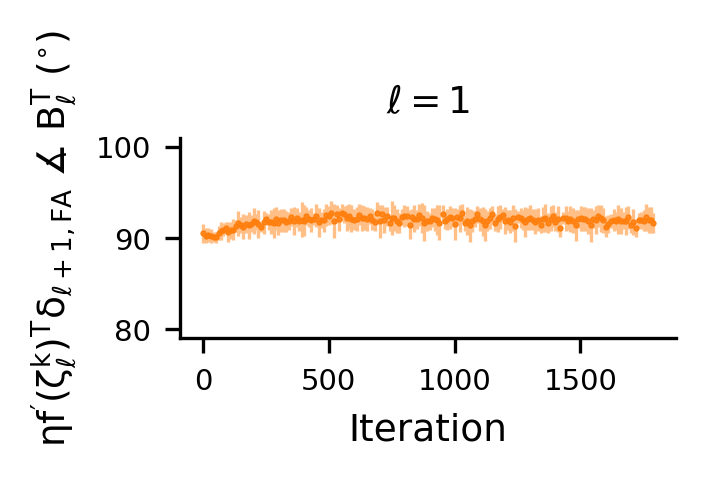

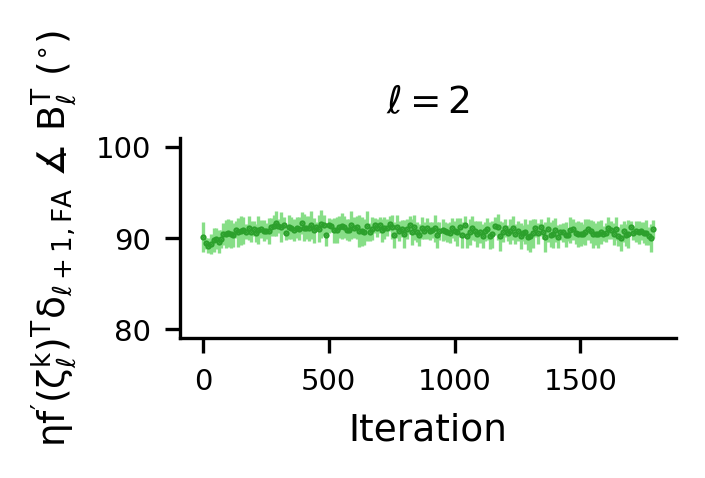

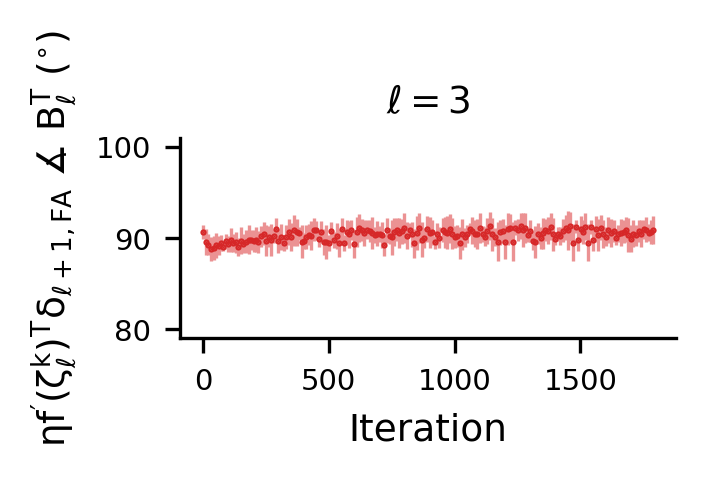

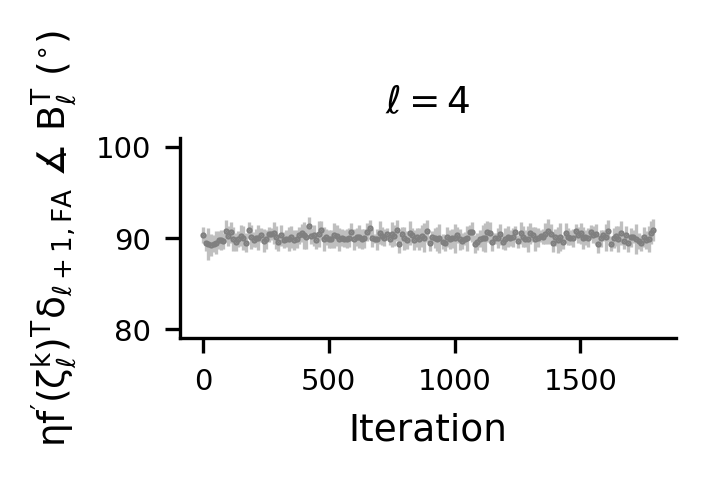

In [ ]:
markersize_=0.5
linewidth_ = 0.8
plt_fontsize_text_=9

plt_fontsize_label_ = 7
figsize_ = (figure_width2/3.9*190/171,figure_width1/6*2*3/4)



# str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d0005)(NoWN)(No_shuffle)(NoIBN)(NoBNM)(Bias)(Detailed)/" 
# str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d00051)(NoWN)(No_shuffle)(NoIBN)(NoBNM)(Bias)(Detailed)/" 

str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d0005)(NoWN)(No_shuffle)(NoIBN)(NoBNM)(Bias)(Detailed)/" 




str_direction = str_dir_data_BASE + "Save_dict" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  Save_dict = pickle.load(fp)



angle_zero_degree_term_B = Save_dict["angle_zero_degree_term_B"]
angle_sum_zero_degree_term_B = Save_dict["angle_sum_zero_degree_term_B"]






N_repetition = angle_zero_degree_term_B.shape[1]

n_layers = angle_zero_degree_term_B.shape[0]
n_iter = angle_zero_degree_term_B.shape[2]

# n_iter = 3000
for l in range(1,5):


  plt.figure(num = None, figsize= figsize_   , dpi=300, facecolor='w', edgecolor='k')

  
  

  mean = angle_zero_degree_term_B[l,:,:].mean(dim=0) .squeeze()

  iteration_list = torch.where ( mean.isnan() == False )[0]

  mean = mean[iteration_list]


  # plt.plot( iteration_list   ,  mean , 'o' , color = my_cycle[l] , markersize = markersize_ , linewidth=linewidth_  )


  std  = angle_zero_degree_term_B[l,:,:].std(dim=0).squeeze()[iteration_list]

  # plt.fill_between( iteration_list , mean-std , mean+std  , color = my_cycle2[l] , alpha=0.2 , linewidth=0    )  


  plt.errorbar( iteration_list , mean , std  , color = my_cycle[l]  , linewidth=0 , marker = 'o'   , markersize = markersize_  , elinewidth=0.8 , ecolor  = lighten_color( my_cycle[l] , amount=0.5))  


  plt.ylabel("$\eta f'( \zeta^k_\ell )^T\delta _{\ell +1,FA }$ $\measuredangle$ $B^T_\ell$ ($^{\circ}$)", fontsize= plt_fontsize_text_)
  plt.xlabel(r"Iteration", fontsize= plt_fontsize_text_ )

  


  ax = plt.gca()
  ax.spines['right'].set_color('none')
  ax.spines['top'].set_color('none')
  ax.xaxis.set_ticks_position('bottom')
  ax.yaxis.set_ticks_position('left')

  ax.tick_params(axis='x', labelsize=plt_fontsize_label_)
  ax.tick_params(axis='y', labelsize=plt_fontsize_label_)
  plt.title(r"$\ell = " + str(l) + "$"  , fontsize= plt_fontsize_text_)
  plt.ylim(79,101)
  # plt.ylim(70,100)


  plt.savefig( base_directory_figure_str +  "angle_zero_degree_term_B_l_"+ str(l) +".jpg" , dpi=300 , bbox_inches='tight'   ,  pad_inches= 0.001  ) 

  plt.show( )


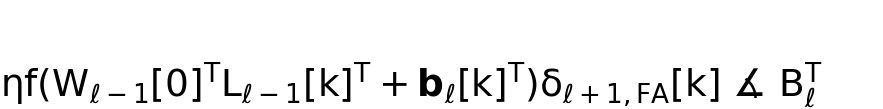

In [ ]:

FIGURE_SIZE = (figure_width1/20,figure_width1/20)
text_X_center = (0 ,  0)


plt_fontsize_text_ = 9

fig = plt.figure(num = None, figsize=FIGURE_SIZE , dpi=300, facecolor='w', edgecolor='k')

r = fig.canvas.get_renderer()



last_obj = plt.text( text_X_center[0] ,text_X_center[1] , r'$\eta f(W_{\ell-1}[0]^TL_{\ell-1}[k]^T + \mathbf{b}_\ell[k]^T) \delta_{\ell+1,FA}[k]\ \measuredangle\ B_\ell^T$' , fontsize= plt_fontsize_text_   
                    , transform= None , ha='left', va='bottom' , clip_on=False )
last_obj_bb = last_obj.get_window_extent(renderer=r)

plt.axis('off')


plt.savefig(base_directory_figure_str + "/title_1.jpg"  
            
            , dpi=300 , bbox_inches='tight',  pad_inches= 0.001 ) 


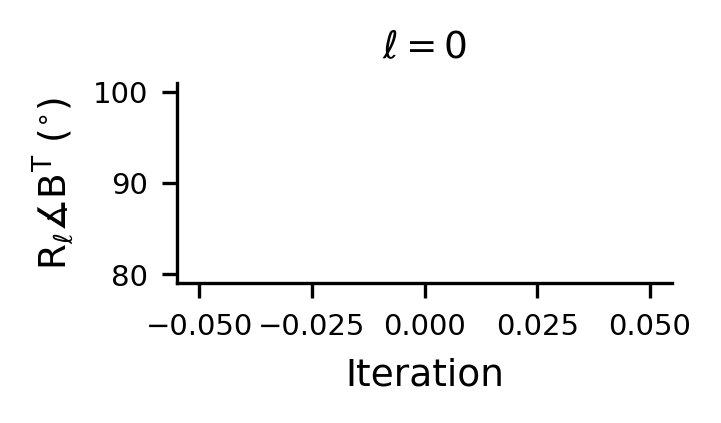

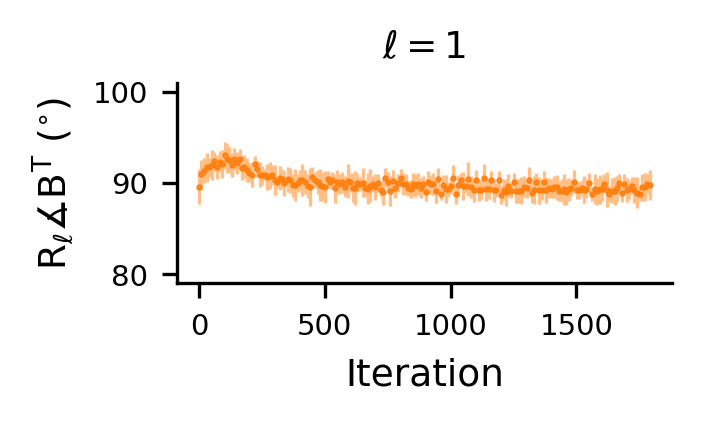

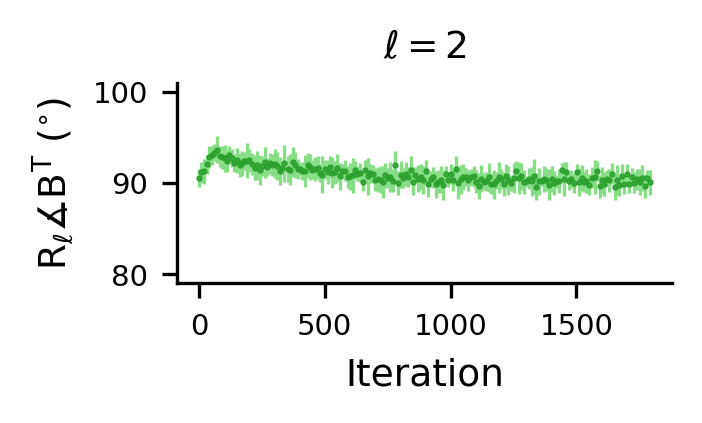

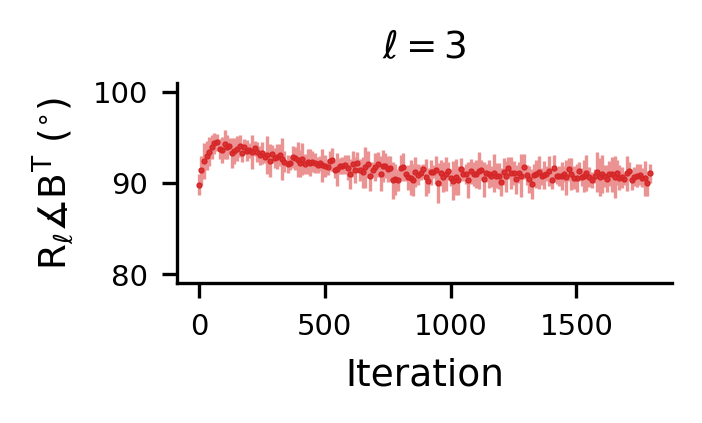

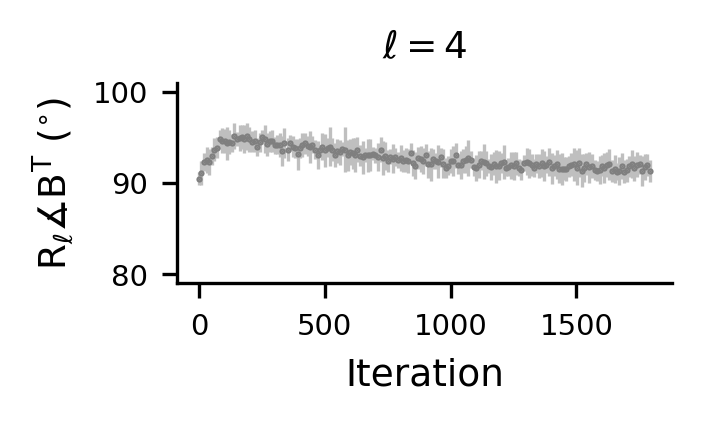

In [ ]:
markersize_=0.5
linewidth_ = 0.8
plt_fontsize_text_=9

plt_fontsize_label_ = 7
figsize_ = (figure_width2/3.9*190/171,figure_width1/6*2*3/4)


# str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d0005)(NoWN)(No_shuffle)(NoIBN)(NoBNM)(Bias)(Detailed)/" 
# str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d00051)(NoWN)(No_shuffle)(NoIBN)(NoBNM)(Bias)(Detailed)/" 

str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d0005)(NoWN)(No_shuffle)(NoIBN)(NoBNM)(Bias)(Detailed)/" 


x=1



str_direction = str_dir_data_BASE + "Save_dict" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  Save_dict = pickle.load(fp)



angle_remainder_B = Save_dict["angle_remainder_B"]


norm_remainder_to_DW = Save_dict["norm_remainder_to_DW"]



angle_sum_remainder_B = Save_dict["angle_sum_remainder_B"]






n_layers = angle_remainder_B.shape[0]
n_iter = angle_remainder_B.shape[2]
# n_iter = 3000
for l in range(5):


  plt.figure(num = None, figsize= figsize_   , dpi=300, facecolor='w', edgecolor='k')




  mean = angle_remainder_B[l,:,:].mean(dim=0) .squeeze()

  iteration_list = torch.where ( mean.isnan() == False )[0]

  mean = mean[iteration_list]


  # plt.plot( iteration_list   ,  mean , 'o' , color = my_cycle[l] , markersize = markersize_ , linewidth=linewidth_  )

  # plt.plot( range(0,n_iter)   ,  angle_sum_zero_degree_term_B[l,0,0:n_iter]  , '-' , color = my_cycle[l] , markersize = markersize_ , linewidth=linewidth_  )


  std  = angle_remainder_B[l,:,:].std(dim=0).squeeze()[iteration_list]

  # plt.fill_between( iteration_list , mean-std , mean+std  , color = my_cycle2[l] , alpha=0.2 , linewidth=0.1    )  

  plt.errorbar( iteration_list , mean , std  , color = my_cycle[l]  , linewidth=0 , marker = 'o'   , markersize = markersize_  , elinewidth=0.8 , ecolor  = lighten_color( my_cycle[l] , amount=0.5))  



  plt.ylabel("$R_{\ell} \measuredangle B^T$ ($^{\circ}$)", fontsize= plt_fontsize_text_)
  plt.xlabel(r"Iteration", fontsize= plt_fontsize_text_ )




  ax = plt.gca()
  ax.spines['right'].set_color('none')
  ax.spines['top'].set_color('none')
  ax.xaxis.set_ticks_position('bottom')
  ax.yaxis.set_ticks_position('left')

  ax.tick_params(axis='x', labelsize=plt_fontsize_label_)
  ax.tick_params(axis='y', labelsize=plt_fontsize_label_)
  plt.title(r"$\ell = " + str(l) + "$"  , fontsize= plt_fontsize_text_)
  plt.ylim(79,101)
  # plt.ylim(70,100)


  plt.savefig( base_directory_figure_str +  "angle_remainder_B_l_"+ str(l) +".jpg" , dpi=300 , bbox_inches='tight'   ,  pad_inches= 0.001  ) 

  plt.show( )


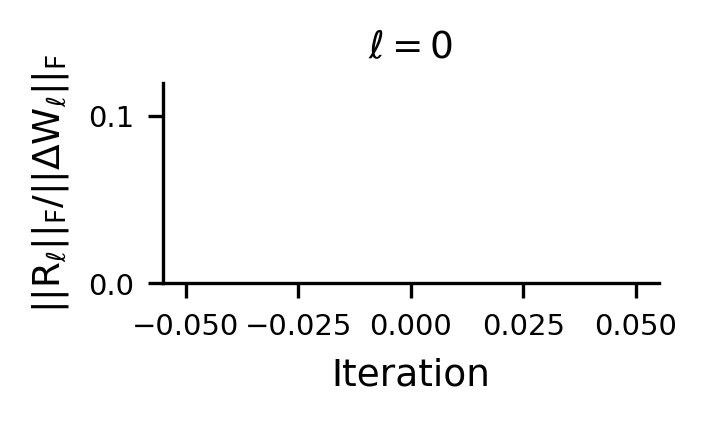

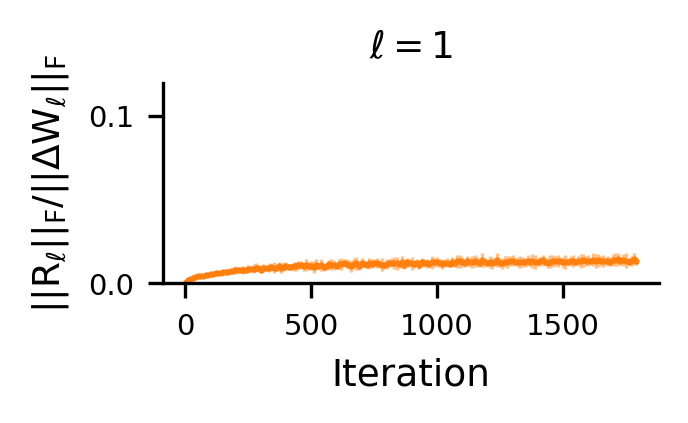

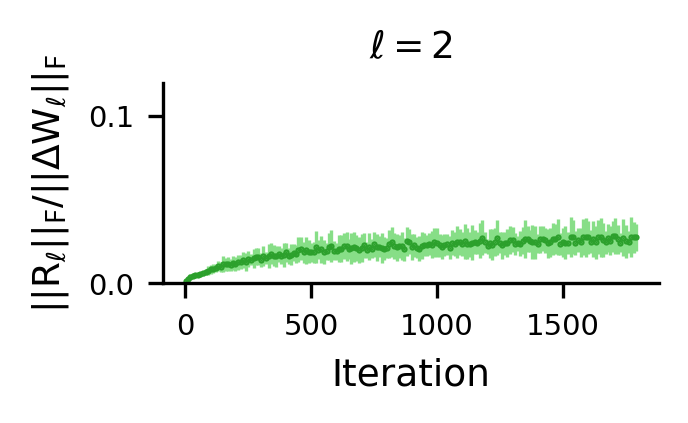

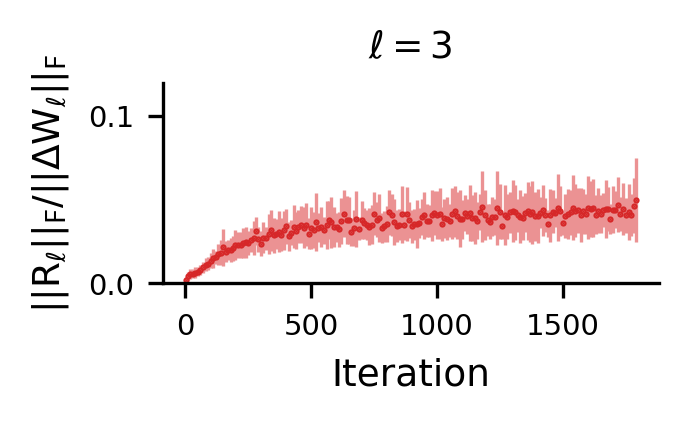

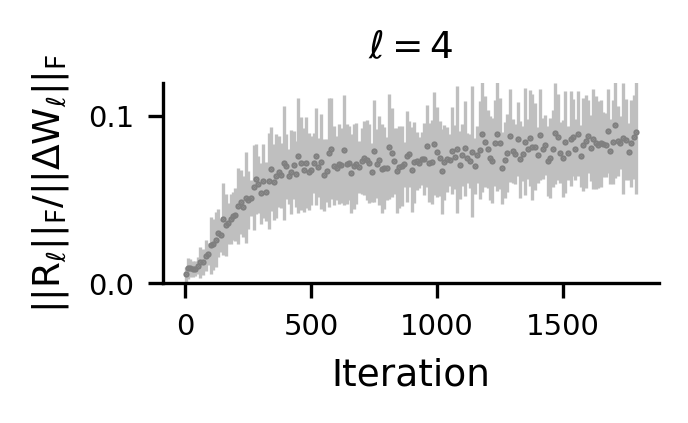

In [ ]:
markersize_=0.5
linewidth_ = 0.8
plt_fontsize_text_=9

plt_fontsize_label_ = 7
figsize_ = (figure_width2/3.9*190/171,figure_width1/6*2*3/4)


# str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d0005)(NoWN)(No_shuffle)(NoIBN)(NoBNM)(Bias)(Detailed)/" 
# str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d00051)(NoWN)(No_shuffle)(NoIBN)(NoBNM)(Bias)(Detailed)/" 

str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d0005)(NoWN)(No_shuffle)(NoIBN)(NoBNM)(Bias)(Detailed)/" 


x=1



str_direction = str_dir_data_BASE + "Save_dict" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  Save_dict = pickle.load(fp)



angle_remainder_B = Save_dict["angle_remainder_B"]


norm_remainder_to_DW = Save_dict["norm_remainder_to_DW"]










n_layers = norm_remainder_to_DW.shape[0]
n_iter = norm_remainder_to_DW.shape[2]
# n_iter = 3000
for l in range(5):


  plt.figure(num = None, figsize= figsize_   , dpi=300, facecolor='w', edgecolor='k')





  mean = norm_remainder_to_DW[l,:,:].mean(dim=0) .squeeze()

  iteration_list = torch.where ( mean.isnan() == False )[0]

  mean = mean[iteration_list]


  # plt.plot( iteration_list   ,  mean , 'o' , color = my_cycle[l] , markersize = markersize_ , linewidth=linewidth_  )

  # plt.plot( range(0,n_iter)   ,  angle_sum_zero_degree_term_B[l,0,0:n_iter]  , '-' , color = my_cycle[l] , markersize = markersize_ , linewidth=linewidth_  )


  std  = norm_remainder_to_DW[l,:,:].std(dim=0).squeeze()[iteration_list]

  # plt.fill_between( iteration_list , mean-std , mean+std  , color = my_cycle2[l] , alpha=0.2 , linewidth=0.1    )  

  plt.errorbar( iteration_list , mean , std  , color = my_cycle[l]  , linewidth=0 , marker = 'o'   , markersize = markersize_  , elinewidth=0.8 , ecolor  = lighten_color( my_cycle[l] , amount=0.5))  


  plt.ylabel("$|| R_{\ell} ||_{F} / || \Delta W_\ell ||_F$", fontsize= plt_fontsize_text_)
  plt.xlabel(r"Iteration", fontsize= plt_fontsize_text_ )




  ax = plt.gca()
  ax.spines['right'].set_color('none')
  ax.spines['top'].set_color('none')
  ax.xaxis.set_ticks_position('bottom')
  ax.yaxis.set_ticks_position('left')

  ax.tick_params(axis='x', labelsize=plt_fontsize_label_)
  ax.tick_params(axis='y', labelsize=plt_fontsize_label_)
  plt.title(r"$\ell = " + str(l) + "$"  , fontsize= plt_fontsize_text_)
  plt.ylim(0 ,0.12)
  plt.yticks([0,0.1])

  plt.savefig( base_directory_figure_str +  "ratio_remainder_to_DW_l_"+ str(l) +".jpg" , dpi=300 , bbox_inches='tight'   ,  pad_inches= 0.001  ) 

  plt.show( )


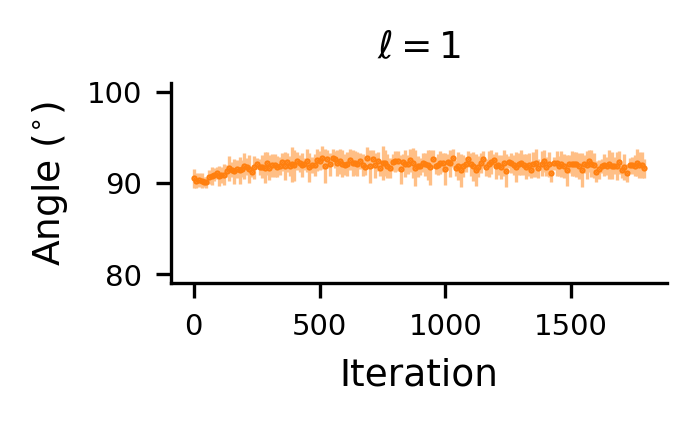

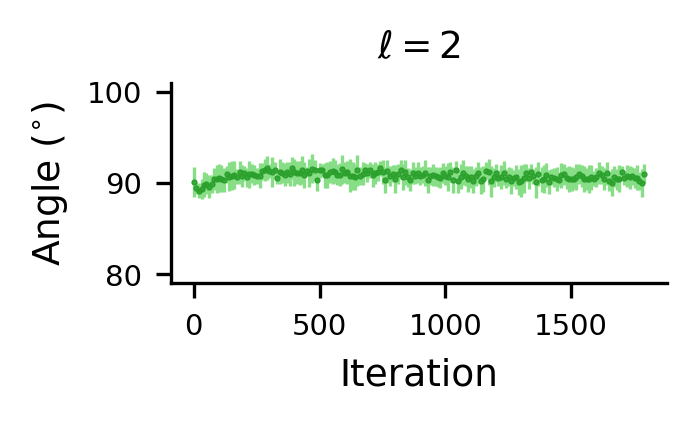

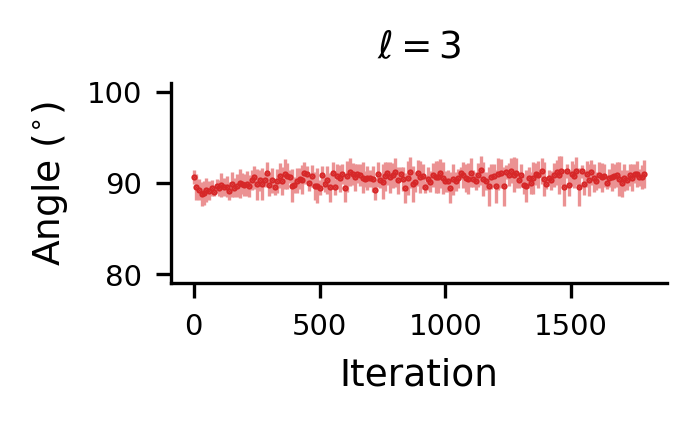

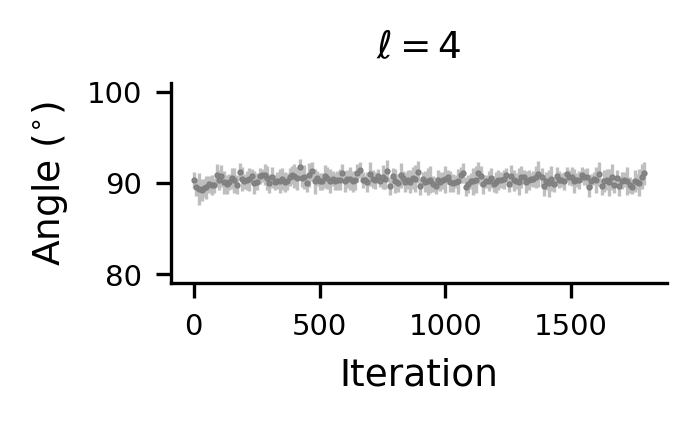

In [ ]:
markersize_=0.5
linewidth_ = 0.8
plt_fontsize_text_=9

plt_fontsize_label_ = 7
figsize_ = (figure_width2/3.9*190/171,figure_width1/6*2*3/4)



# str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d0005)(NoWN)(No_shuffle)(NoIBN)(NoBNM)(Bias)(Detailed)/" 
# str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d00051)(NoWN)(No_shuffle)(NoIBN)(NoBNM)(Bias)(Detailed)/" 

str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d0005)(NoWN)(No_shuffle)(NoIBN)(NoBNM)(Bias)(Detailed)/" 




str_direction = str_dir_data_BASE + "Save_dict" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  Save_dict = pickle.load(fp)



angle_zero_degree_term_B = Save_dict["angle_non_align_B"]
# angle_sum_zero_degree_term_B = Save_dict["angle_sum_zero_degree_term_B"]






N_repetition = angle_zero_degree_term_B.shape[1]

n_layers = angle_zero_degree_term_B.shape[0]
n_iter = angle_zero_degree_term_B.shape[2]

# n_iter = 3000
for l in range(1,5):


  plt.figure(num = None, figsize= figsize_   , dpi=300, facecolor='w', edgecolor='k')

  
  

  mean = angle_zero_degree_term_B[l,:,:].mean(dim=0) .squeeze()

  iteration_list = torch.where ( mean.isnan() == False )[0]

  mean = mean[iteration_list]


  # plt.plot( iteration_list   ,  mean , 'o' , color = my_cycle[l] , markersize = markersize_ , linewidth=linewidth_  )


  std  = angle_zero_degree_term_B[l,:,:].std(dim=0).squeeze()[iteration_list]

  # plt.fill_between( iteration_list , mean-std , mean+std  , color = my_cycle2[l] , alpha=0.2 , linewidth=0    )  


  plt.errorbar( iteration_list , mean , std  , color = my_cycle[l]  , linewidth=0 , marker = 'o'   , markersize = markersize_  , elinewidth=0.8 , ecolor  = lighten_color( my_cycle[l] , amount=0.5))  


  plt.ylabel("Angle ($^{\circ}$)", fontsize= plt_fontsize_text_)
  plt.xlabel(r"Iteration", fontsize= plt_fontsize_text_ )

  


  ax = plt.gca()
  ax.spines['right'].set_color('none')
  ax.spines['top'].set_color('none')
  ax.xaxis.set_ticks_position('bottom')
  ax.yaxis.set_ticks_position('left')

  ax.tick_params(axis='x', labelsize=plt_fontsize_label_)
  ax.tick_params(axis='y', labelsize=plt_fontsize_label_)
  plt.title(r"$\ell = " + str(l) + "$"  , fontsize= plt_fontsize_text_)
  plt.ylim(79,101)
  # plt.ylim(70,100)


  plt.savefig( base_directory_figure_str +  "angle_non_align_B_l_"+ str(l) +".jpg" , dpi=300 , bbox_inches='tight'   ,  pad_inches= 0.001  ) 

  plt.show( )


In [ ]:
# markersize_=0.5
# linewidth_ = 0.8
# plt_fontsize_text_=9

# plt_fontsize_label_ = 7
# figsize_ = (figure_width2/3.9*190/171,figure_width1/6*2*3/4)


# # str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d0005)(NoWN)(No_shuffle)(NoIBN)(NoBNM)(Bias)(Detailed)/" 
# # str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d00051)(NoWN)(No_shuffle)(NoIBN)(NoBNM)(Bias)(Detailed)/" 

# str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d0005)(NoWN)(No_shuffle)(NoIBN)(NoBNM)(Bias)(Detailed)/" 


# x=1



# str_direction = str_dir_data_BASE + "Save_dict" +  ".txt"
# with open( str_direction , "rb") as fp:   #Pickling
#   Save_dict = pickle.load(fp)



# # angle_remainder_B = Save_dict["norm_non_align_to_DW"]


# norm_remainder_to_DW = Save_dict["norm_non_align_to_DW"]










# n_layers = norm_remainder_to_DW.shape[0]
# n_iter = norm_remainder_to_DW.shape[2]
# # n_iter = 3000
# for l in range(5):


#   plt.figure(num = None, figsize= figsize_   , dpi=300, facecolor='w', edgecolor='k')





#   mean = norm_remainder_to_DW[l,:,:].mean(dim=0) .squeeze()

#   iteration_list = torch.where ( mean.isnan() == False )[0]

#   mean = mean[iteration_list]


#   # plt.plot( iteration_list   ,  mean , 'o' , color = my_cycle[l] , markersize = markersize_ , linewidth=linewidth_  )

#   # plt.plot( range(0,n_iter)   ,  angle_sum_zero_degree_term_B[l,0,0:n_iter]  , '-' , color = my_cycle[l] , markersize = markersize_ , linewidth=linewidth_  )


#   std  = norm_remainder_to_DW[l,:,:].std(dim=0).squeeze()[iteration_list]

#   # plt.fill_between( iteration_list , mean-std , mean+std  , color = my_cycle2[l] , alpha=0.2 , linewidth=0.1    )  

#   plt.errorbar( iteration_list , mean , std  , color = my_cycle[l]  , linewidth=0 , marker = 'o'   , markersize = markersize_  , elinewidth=0.8 , ecolor  = lighten_color( my_cycle[l] , amount=0.5))  


#   plt.ylabel("$||R_{\ell}||_{F} / ||\Delta W_\ell||_F$", fontsize= plt_fontsize_text_)
#   plt.xlabel(r"Iteration", fontsize= plt_fontsize_text_ )




#   ax = plt.gca()
#   ax.spines['right'].set_color('none')
#   ax.spines['top'].set_color('none')
#   ax.xaxis.set_ticks_position('bottom')
#   ax.yaxis.set_ticks_position('left')

#   ax.tick_params(axis='x', labelsize=plt_fontsize_label_)
#   ax.tick_params(axis='y', labelsize=plt_fontsize_label_)
#   plt.title(r"$\ell = " + str(l) + "$"  , fontsize= plt_fontsize_text_)
#   # plt.ylim(0 ,0.12)
#   # plt.yticks([0,0.1])

#   plt.savefig( base_directory_figure_str +  "ratio_non_align_to_DW_l_"+ str(l) +".jpg" , dpi=300 , bbox_inches='tight'   ,  pad_inches= 0.001  ) 

#   plt.show( )
